## Hyperparameter Optimization for dual moving average on single asset

In [1]:
import vectorbt as vbt
import warnings
import numpy

warnings.filterwarnings("ignore")

In [2]:
close_price = vbt.YFData.download("SPY", missing_index="drop",
                                  start="2020-01-01").get("Close")
print(close_price)

Date
2019-12-31 05:00:00+00:00    304.527771
2020-01-02 05:00:00+00:00    307.375671
2020-01-03 05:00:00+00:00    305.048126
2020-01-06 05:00:00+00:00    306.211945
2020-01-07 05:00:00+00:00    305.350922
                                ...    
2023-08-02 04:00:00+00:00    450.130005
2023-08-03 04:00:00+00:00    448.839996
2023-08-04 04:00:00+00:00    446.809998
2023-08-07 04:00:00+00:00    450.709991
2023-08-08 04:00:00+00:00    448.750000
Name: Close, Length: 907, dtype: float64


In [3]:
windows = numpy.arange(2,101)
fast_ma, slow_ma = vbt.MA.run_combs(close_price, window=windows,
                                    r=2, short_names=["fast","slow"])

In [4]:
# entry and exit condition
# Problem: Couldn't get rsi inside the condition?
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma) 

In [5]:

pf_kwargs = dict(size=numpy.inf, fees=0.0025, slippage=0.0025, freq="1D")
pf = vbt.Portfolio.from_signals(close_price, 
                                entries, 
                                exits,
                                **pf_kwargs)

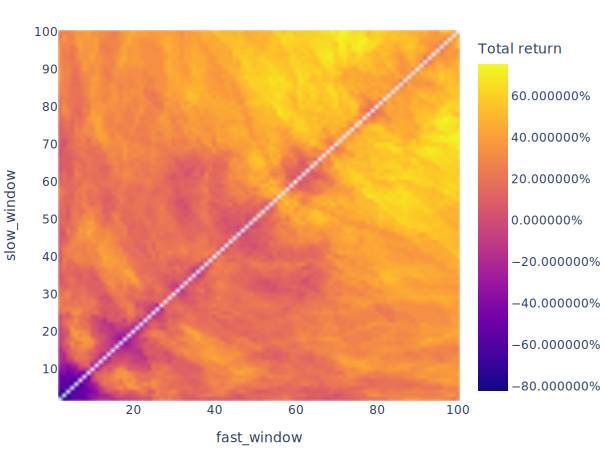

In [6]:
# can test on other metrics other than total_returns, e.g., sharpe ratio?
fig = pf.total_return().vbt.heatmap(
    x_level="fast_window", y_level="slow_window",
    symmetric=True,
    trace_kwargs=dict(colorbar=dict(title="Total return", tickformat="%"))
)
fig.show_svg()

In [7]:
# Hyperparameter optimizatioo
fig = pf.sharpe_ratio().vbt.heatmap(
    x_level="fast_window", y_level="slow_window",
    symmetric=True,
    trace_kwargs=dict(colorbar=dict(title="Sharpe ratio", tickformat="%"))
)
fig.show()